# Correlating Windows Security Auditing

-----------------------------------

* **Author**: Jose Luis Rodriguez - [@Cyb3rPandaH](https://twitter.com/Cyb3rPandaH)
* **Organization**: [Open Threat Research (OTR)](https://github.com/OTRF)
* **References**: 
 - [OSSEM - Data Dictionaries: Correlating Security Telemetry](https://blog.openthreatresearch.com/ossem_security_telemetry_correlation)
 - [OSSEM - Data Dictionaries](https://github.com/OTRF/OSSEM-DD)

### 1) Importing Python Libraries

In [2]:
from openhunt import ossem

import pandas as pd
pd.set_option('display.max_colwidth', None)


### 2) Getting All Dictionaries' Names for Security Auditing

In [3]:
# Getting a Python list with dictionaries' names
security_auditing_events = ossem.getDictionaryName('Windows','Security')
# Printing number of dictionaries collected
print(len(security_auditing_events), " dictionaries' names collected!!")
# Example of 5 names
security_auditing_events[:5]

392  dictionaries' names collected!!


['event-4610.yml',
 'event-4611.yml',
 'event-4612.yml',
 'event-4614.yml',
 'event-4615.yml']

### 3) Getting OSSEM Dictionaries Content for Security Auditing

In [4]:
# Getting OSSEM dictionaries content (summary view)
security_auditing_dictionaries = ossem.getDictionaryContent('Windows','Security',security_auditing_events,view = 'summary')
# Example of dictionary content
security_auditing_dictionaries.head(10)

,title,event_id,standard_name,name,field_description,sample_value
0,Event ID 4610: An authentication package has been loaded by the Local Security Authority.,4610,logon_authentication_package_name,AuthenticationPackageName,the name of loaded Authentication Package. The format is: DLL_PATH_AND_NAME: AUTHENTICATION_PACKAGE_NAME.,C:\Windows\system32\msv1_0.DLL : MICROSOFT_AUTHENTICATION_PACKAGE_V1_0
1,Event ID 4611: A trusted logon process has been registered with the Local Security Authority.,4611,user_sid,SubjectUserSid,SID of account that registered the trusted logon process.,S-1-5-18
2,Event ID 4611: A trusted logon process has been registered with the Local Security Authority.,4611,user_name,SubjectUserName,the name of the account that registered the trusted logon process.,DC01$
3,Event ID 4611: A trusted logon process has been registered with the Local Security Authority.,4611,user_domain,SubjectDomainName,subject's domain or computer name.,CONTOSO
4,Event ID 4611: A trusted logon process has been registered with the Local Security Authority.,4611,user_logon_id,SubjectLogonId,"hexadecimal value that can help you correlate this event with recent events that might contain the same Logon ID, for example, ""4624: An account was successfully logged on.""",0x3e7
5,Event ID 4611: A trusted logon process has been registered with the Local Security Authority.,4611,logon_process_name,LogonProcessName,the name of registered logon process.,Winlogon
6,Event 4612 - task_0,4612,TBD,AuditsDiscarded,None,None
7,Event ID 4614: A notification package has been loaded by the Security Account Manager.,4614,logon_notification_package_name,NotificationPackageName,the name of loaded Notification Package.,WDIGEST
8,Event 4615 - task_0,4615,TBD,SubjectUserSid,None,None
9,Event 4615 - task_0,4615,TBD,SubjectUserName,None,None


### 4) Filtering Data Fields for Event 4624: An account was successfully logged on

In [5]:
security_auditing_dictionaries[security_auditing_dictionaries['event_id'] == '4624'][['name']]

,name
34,SubjectUserSid
35,SubjectUserName
36,SubjectDomainName
37,SubjectLogonId
38,TargetUserSid
39,TargetUserName
40,TargetDomainName
41,TargetLogonId
42,LogonType
43,LogonProcessName


### 5) Identifying other Security Auditing events that contain 'LogonType' data field

In [6]:
security_auditing_dictionaries[security_auditing_dictionaries['name'] == 'LogonType']

,title,event_id,standard_name,name,field_description,sample_value
42,Event ID 4624: An account was successfully logged on,4624,logon_type,LogonType,the type of logon which was performed,2
71,Event ID 4625: An account failed to log on,4625,logon_type,LogonType,the type of logon which was performed,2
90,Event ID 4626: User/Device claims information,4626,logon_type,LogonType,the type of logon which was performed.,3
103,Event ID 4627: Group membership information,4627,logon_type,LogonType,the type of logon which was performed.,3
111,Event ID 4634: An account was logged off,4634,logon_type,LogonType,the type of logon which was performed.,2


### 6) Identifying other Security Auditing events that contain 'LogonType' and 'TargetLogonId' data fields

In [7]:
data_fields = security_auditing_dictionaries[(security_auditing_dictionaries['name'] == 'LogonType') | \
                                             (security_auditing_dictionaries['name'] == 'TargetLogonId')]
data_fields

,title,event_id,standard_name,name,field_description,sample_value
29,Event ID 4618: A monitored security event pattern has occurred.,4618,user_logon_id,TargetLogonId,,0x1
41,Event ID 4624: An account was successfully logged on,4624,user_logon_id,TargetLogonId,hexadecimal value that can help you correlate this event with recent events that might contain the same Logon ID,0x8dcdc
42,Event ID 4624: An account was successfully logged on,4624,logon_type,LogonType,the type of logon which was performed,2
71,Event ID 4625: An account failed to log on,4625,logon_type,LogonType,the type of logon which was performed,2
89,Event ID 4626: User/Device claims information,4626,user_logon_id,TargetLogonId,hexadecimal value that can help you correlate this event with recent events that might contain the same Logon ID,0x136f7b
90,Event ID 4626: User/Device claims information,4626,logon_type,LogonType,the type of logon which was performed.,3
102,Event ID 4627: Group membership information,4627,user_logon_id,TargetLogonId,hexadecimal value that can help you correlate this event with recent events that might contain the same Logon ID,0x136f7b
103,Event ID 4627: Group membership information,4627,logon_type,LogonType,the type of logon which was performed.,3
110,Event ID 4634: An account was logged off,4634,user_logon_id,TargetLogonId,hexadecimal value that can help you correlate this event with recent events that might contain the same Logon ID,0x1a0992
111,Event ID 4634: An account was logged off,4634,logon_type,LogonType,the type of logon which was performed.,2


### 7) Visualizing Security Auditing events that contain 'LogonType' and 'TargetLogonId' data fields: Network Graph

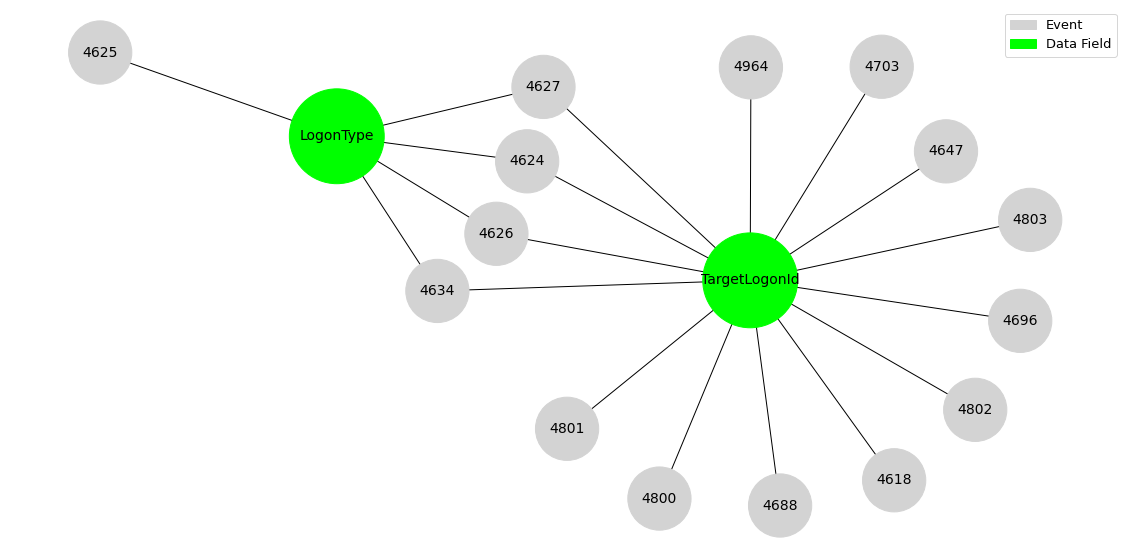

In [8]:
ossem.event_to_field_network(data_fields,type = 'original')

### 8) Visualizing Security Auditing events that contain Standard Names for 'LogonType' and 'TargetLogonId' data fields: Network Graph

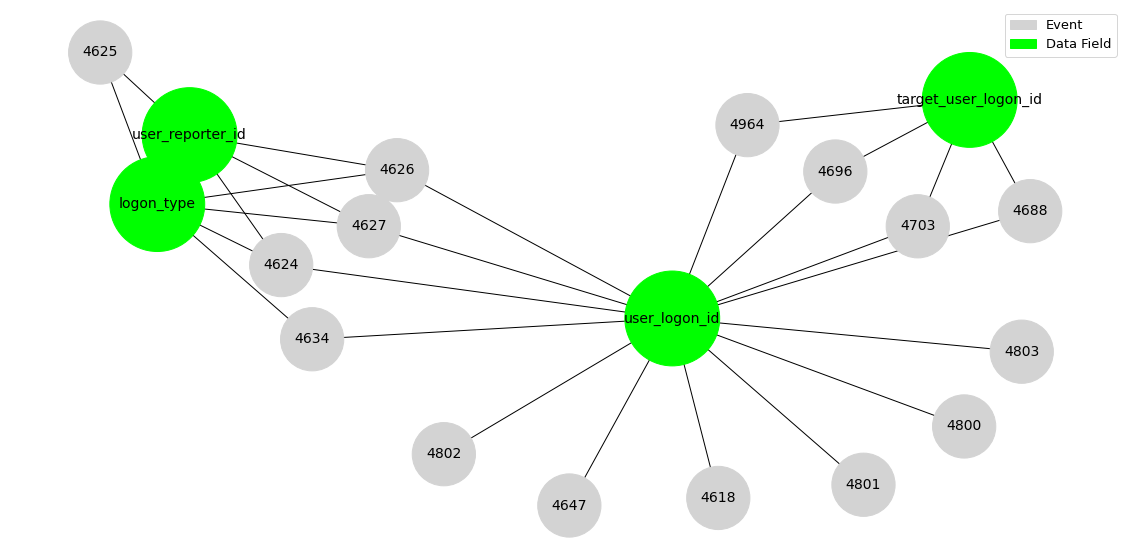

In [9]:
# Getting a list of event_id used in our previous network graph
event_for_graph = data_fields['event_id'].tolist()
# Adding 'SubjectLogonId' data field to the filer
data_fields_2 = security_auditing_dictionaries[((security_auditing_dictionaries['name'] == 'LogonType') | \
                                               (security_auditing_dictionaries['name'] == 'TargetLogonId') | \
                                               (security_auditing_dictionaries['name'] == 'SubjectLogonId')) \
                                               & (security_auditing_dictionaries['event_id'].isin(event_for_graph))]
# Creating network graph using standard names
ossem.event_to_field_network(data_fields_2,type = 'standard')